In [1]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_gcfp.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [3]:
#df['Diag'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      64 non-null     object 
 1   P100    64 non-null     float64
 2   P41     64 non-null     float64
 3   OspC    64 non-null     float64
 4   DbpA    64 non-null     float64
 5   BmpA    64 non-null     float64
 6   DbpB    64 non-null     float64
 7   P45     64 non-null     float64
 8   P58     64 non-null     float64
 9   P66     64 non-null     float64
 10  VlsE    64 non-null     float64
 11  ErpL    64 non-null     float64
 12  OspD    64 non-null     float64
 13  Diag    64 non-null     object 
dtypes: float64(12), object(2)
memory usage: 7.1+ KB


In [4]:
df.columns
#df.dtypes

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
#X = df.drop(['Diag','ID'], axis=1)  
#X = df.filter(['VlsE', 'DbpA', 'DbpB', 'P58', 'OspC', 'BmpA', 'P45'],axis=1) 
X = df.filter(['VlsE', 'DbpA', 'DbpB', 'P58', 'OspC','ErpL','P66'],axis=1)
y = df['Diag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(48, 7)
(48,)
(16, 7)
(16,)


In [6]:
#gridsearch enables automation of a cross validation on each combination of multiple 
#supplied parameters to find the best performing estimator. 
from sklearn.model_selection import GridSearchCV

In [7]:
#here, we are specifying the four common kernel functions and a range of associated hyperparameters ('C' and 'gamma')
#you may want to play with the C and gamma parameter values to fine tune around the results of the "best_estimator" after it is reported
#if you want to specify a large range of floating point values without typing them out,
#then use something like this: cvals = np.arange(.1, 4.0, .1,dtype=float)
#cvals = [0.1,1,5,10,15]
cvals = np.arange(8.90,9.1,.1)
#gvals = np.arange(.005,.015,.001)
gvals = [1,0.1,0.01,0.001]
param_grid = {'C': cvals, 'gamma': gvals,'kernel': ['linear','rbf', 'poly', 'sigmoid']}


In [8]:
#this code implelements the grid 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=8.9, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=8.9, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=8.9, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=8.9, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=8.9, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=8.9, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=8.9, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=8.9, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=8.9, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=8.9, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=8.9, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=8.9, gamma=1

[CV] END ...................C=9.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=9.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=9.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=9.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=9.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=9.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=9.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=9.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=9.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=9.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=9.0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=9.0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([8.9, 9. ]), 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [9]:
print(grid.best_estimator_)

SVC(C=8.9, gamma=0.1)


In [10]:
#following lines are examples of printing individual parameters (see API docs for more info)
#print(grid.best_estimator_.C)
#print(grid.best_estimator_.kernel)
#print(grid.best_estimator_.gamma)

#will print all grid parameters
print(grid.get_params()) 



{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'n_jobs': None, 'param_grid': {'C': array([8.9, 9. ]), 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 2}


In [11]:
clf = SVC(kernel=grid.best_estimator_.kernel, C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
clf.fit(X_train, y_train) 

SVC(C=8.9, gamma=0.1)

In [12]:
#assign the determined best to the clf ('classifier') variable
#clf = grid.best_estimator_
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))#Output




[[8 0 0 0]
 [1 1 1 0]
 [1 0 1 1]
 [0 1 0 1]]
                   precision    recall  f1-score   support

              Neg       0.80      1.00      0.89         8
Pos - Early Acute       0.50      0.33      0.40         3
 Pos - Early Conv       0.50      0.33      0.40         3
       Pos - Late       0.50      0.50      0.50         2

         accuracy                           0.69        16
        macro avg       0.57      0.54      0.55        16
     weighted avg       0.65      0.69      0.66        16



In [13]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
import itertools

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)


                   precision    recall  f1-score   support

              Neg       0.80      1.00      0.89         8
Pos - Early Acute       0.50      0.33      0.40         3
 Pos - Early Conv       0.50      0.33      0.40         3
       Pos - Late       0.50      0.50      0.50         2

         accuracy                           0.69        16
        macro avg       0.57      0.54      0.55        16
     weighted avg       0.65      0.69      0.66        16

Confusion matrix, without normalization
[[8 0 0 0]
 [1 1 1 0]
 [1 0 1 1]
 [0 1 0 1]]


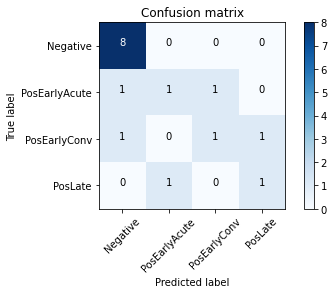

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','PosEarlyAcute','PosEarlyConv','PosLate'],normalize= False,  title='Confusion matrix')

In [18]:
#from sklearn.metrics import jaccard_score
#jaccard_score(y_test, y_pred, average='weighted')

0.5354166666666667

In [24]:
#note, it is not unusual to get warning messages based on some of the specific test/train split groupings
from sklearn import metrics 
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0
count = 100
classes=['Negative','PosEarlyAcute','PosEarlyConv','PosLate']
new_model = SVC(kernel=grid.best_estimator_.kernel, C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
for n in range(1, count+1):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, stratify=y)       
    new_model.fit(X_tr, y_tr)
    yh = new_model.predict(X_te)
    cr = classification_report(y_te, yh, output_dict=True)
    cnf_matrix = confusion_matrix(y_te, yh)
    
    
    curr_accuracy = metrics.accuracy_score(y_te,yh)
    #the code below derives TP/FP/TN/FN values from the multiclass confusion matrix by ignoring 
    #misclassification of positive subclasses   
    curr_false_pos = cnf_matrix.sum(axis=1)[0]-cnf_matrix[0][0]
    curr_false_neg = cnf_matrix.sum(axis=0)[0]-cnf_matrix[0][0]
    curr_true_neg = cnf_matrix[0][0]
    curr_true_pos = cnf_matrix.sum()-(curr_false_pos+curr_false_neg+curr_true_neg)    
        
    curr_sensitivity = curr_true_pos/(curr_true_pos+curr_false_neg)
    
    curr_specificity = cr["Neg"]["recall"]
    print("Run: %d" % (n))
    print(' Accuracy: %.3f ' % (curr_accuracy))
    print(' Sensitivity: %.3f ' % (curr_sensitivity))
    print(' Specificity: %.3f ' % (curr_specificity))
    
    #rows = y_te.index
    #format_probabilities(yps , classes, rows)
    
    sensitivity_sum = sensitivity_sum + curr_sensitivity
    specificity_sum = specificity_sum + curr_specificity
    accuracy_sum = accuracy_sum + curr_accuracy
    

average_accuracy = accuracy_sum/count
average_sensitivity = sensitivity_sum/count
average_specificity = specificity_sum/count
print('')
print('Average Results:')
print('Average Accuracy: %.3f ' % (average_accuracy))
print('Average Sensitivity: %.3f ' % (average_sensitivity))
print('Average Specificity: %.3f ' % (average_specificity))

Run: 1
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 2
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 3
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 4
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 5
 Accuracy: 0.562 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 6
 Accuracy: 0.688 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 7
 Accuracy: 0.625 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 8
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 9
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 10
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 11
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 12
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 13
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 14
 Accuracy: 0.562 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 15
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 16
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 17
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 18
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 19
 Accuracy: 0.562 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 20
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 21
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 22
 Accuracy: 0.625 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 23
 Accuracy: 0.500 
 Sensitivity: 0.556 
 Specificity: 0.857 
Run: 24
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 25
 Accuracy: 0.625 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 26
 Accuracy: 0.625 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 27
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 28
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 29
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 30
 Accuracy: 0.562 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 31
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 32
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 33
 Accuracy: 0.625 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 34
 Accuracy: 0.562 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 35
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 36
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 37
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 38
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 39
 Accuracy: 0.812 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 40
 Accuracy: 0.625 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 41
 Accuracy: 0.688 
 Sensitivity: 0.375 
 Specificity: 1.000 
Run: 42
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 43
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 44
 Accuracy: 0.562 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 45
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 46
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 47
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 48
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 49
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 50
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 51
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 52
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 53
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 54
 Accuracy: 0.625 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 55
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 56
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 57
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 58
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 59
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 60
 Accuracy: 0.562 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 61
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 62
 Accuracy: 0.500 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 63
 Accuracy: 0.625 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 64
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 65
 Accuracy: 0.688 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 66
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 67
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 68
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 69
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 70
 Accuracy: 0.625 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 71
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 72
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 73
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 74
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 75
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 76
 Accuracy: 0.812 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 77
 Accuracy: 0.562 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 78
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 79
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 80
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 81
 Accuracy: 0.562 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 82
 Accuracy: 0.750 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 83
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 84
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 85
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 86
 Accuracy: 0.500 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 87
 Accuracy: 0.562 
 Sensitivity: 0.667 
 Specificity: 0.857 
Run: 88
 Accuracy: 0.562 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\

Run: 89
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 90
 Accuracy: 0.625 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 91
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 92
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 0.857 
Run: 93
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 94
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 95
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 96
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 97
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 98
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 99
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 100
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 1.000 

Average Results:
Average Accuracy: 0.684 
Average Sensitivity: 0.778 
Average Specificity: 0.979 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\